In [1]:
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes
from typing import List

import matplotlib.pyplot as plt
import pandas as pd
import re

import config_syntheic as config

In [2]:
def load_csv_data(path: str) -> pd.core.frame.DataFrame:
    """Load CSV dataset as dataframe"""
    return pd.read_csv(path, delimiter=',')

In [3]:
def plot_syntheic_load(true_values: any, predicted_values: any, test_data_path: str) -> None:
    plt.figure(figsize=(10, 6))
    plt.plot(true_values, label='True Values')
    filename = test_data_path.split('/')[-1].split('.')[0]

    for i in range(config.nTrial):
        plt.plot(predicted_values.iloc[:, i], label=f'Prediction {i+1}')

    plt.xlabel('Time step t')
    plt.ylabel('sin(t)')
    plt.title(f'Syntheic Data Prediction ({filename})')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [4]:
def plot_syntheic_load_by_mean_max_min(true_values: any, predicted_values: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)

    # sampling time points
    sampled_time_points = time_points[::sampling_interval]

    mean_values = predicted_values.mean(axis=1)
    sampled_mean_values = mean_values[sampled_time_points]

    max_values = predicted_values.max(axis=1)
    min_values = predicted_values.min(axis=1)

    sampled_max_values = max_values[sampled_time_points]
    sampled_min_values = min_values[sampled_time_points]

    plt.plot(sampled_time_points, sampled_mean_values, marker='^', linestyle='-', color='blue', label='Mean')
    plt.plot(sampled_time_points, sampled_max_values, marker='_', linestyle='', color='red', label='Max')
    plt.plot(sampled_time_points, sampled_min_values, marker='_', linestyle='', color='green', label='Min')
    plt.plot(true_values, color='black', label='True Values')

    for t in sampled_time_points:
        plt.plot([t, t], [sampled_min_values[t], sampled_max_values[t]], linestyle='-', color='gray')

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()


In [5]:
def plot_syntheic_load_by_mean_std(true_values: any, predicted_values: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    mean_values = predicted_values.mean(axis=1)
    std_values = predicted_values.std(axis=1)

    sampled_mean_values = mean_values[sampled_time_points]
    sampled_std_values = std_values[sampled_time_points]

    plt.plot(sampled_time_points, sampled_mean_values, marker='^', markersize=6, linestyle='-', color='blue', label='Prediction')
    plt.errorbar(sampled_time_points, sampled_mean_values, yerr=sampled_std_values, fmt='_', color='red', elinewidth=1, capsize=3)
    plt.plot(time_points, true_values, color='black', label='True Values')

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [6]:
def plot_syntheic_load_list_by_mean_std(true_values: any, predicted_values_list: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_predicted_value in predicted_values_list:
        mean_values = case_predicted_value.mean(axis=1)
        std_values = case_predicted_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])
    
    for index in range(len(sampled_mean_values_list)):
        plt.plot(sampled_time_points, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=f'Case {index+1}')
        # plt.errorbar(sampled_time_points, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3)

    plt.plot(time_points, true_values, color='black', label='True Values')

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [7]:
def plot_syntheic_load_list_by_mean_std_with_labels(true_values: any, predicted_values_list: any, labels: List[str],  sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_predicted_value in predicted_values_list:
        mean_values = case_predicted_value.mean(axis=1)
        std_values = case_predicted_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])
    
    plt.plot(time_points, true_values, color='black', label='True Values')
    for label in labels:
        case_number = int(re.search(r'\d+', label).group())  # Extract case number from label
        color = config.color_dict.get(case_number, 'k')  # Default to black if case number not found
        index = labels.index(label)
        
        plt.plot(sampled_time_points, sampled_mean_values_list[index], markersize=6, linestyle='-', label=label, color=color)
        # plt.errorbar(sampled_time_points, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3)


    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [8]:
def plot_prediction_absolute_error(error_abs_value: any) -> None:
    plt.figure(figsize=(10, 6))

    x_values = [i for i in range(config.start, config.end+1)]

    for i in range(config.nTrial):
        plt.plot(x_values, error_abs_value.iloc[:, i], label=f'Prediction {i+1}')

    plt.xlabel('Time step t')
    plt.ylabel('Prediction error')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [9]:
def plot_prediction_absolute_error_by_mean_std(error_abs_value: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    # TODO: fix this error epoch start and end
    x_values = range(config.start, config.end+1)
    sampled_x_values = x_values[::sampling_interval]

    time_points = range(config.error_abs_start, config.error_abs_end+1)
    sampled_time_points = time_points[::sampling_interval]

    mean_values = error_abs_value.mean(axis=1)
    std_values = error_abs_value.std(axis=1)

    sampled_mean_values = mean_values[sampled_time_points]
    sampled_std_values = std_values[sampled_time_points]

    # TODO: fix this error epoch start and end
    plt.plot(sampled_x_values, sampled_mean_values, marker='^', markersize=6, linestyle='-', color='blue', label='Error')
    # TODO: fix this error epoch start and end
    plt.errorbar(sampled_x_values, sampled_mean_values, yerr=sampled_std_values, fmt='_', color='red', elinewidth=1, capsize=3)

    plt.xlabel('Time Step t')
    plt.ylabel('sin(t)')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()
    

In [10]:
def plot_prediction_absolute_error_list_by_mean_std(error_abs_value_list: any, sampling_interval: int, zoom_coords: tuple) -> None:
    fig, ax = plt.subplots(figsize=(10, 6))

    x_values = range(config.start, config.end+1)
    sampled_x_values = x_values[::sampling_interval]

    time_points = range(config.error_abs_start, config.error_abs_end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_error_abs_value in error_abs_value_list:
        mean_values = case_error_abs_value.mean(axis=1)
        std_values = case_error_abs_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])

    for index in range(len(sampled_mean_values_list)):
        color = config.color_dict.get(index % len(config.color_dict))
        ax.plot(sampled_x_values, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=f'Case {index+1}')
        ax.errorbar(sampled_x_values, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)

    ax.set_xlabel('Time Step t')
    ax.set_ylabel('Prediction error')
    ax.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    
    zoom_coords_x = zoom_coords[0]
    zoom_coords_y = zoom_coords[1]

    # The `inset_axes`` function is used to create an inset axes, allowing you to create a zoomed-in plot within a larger plot.
    # It can be used to specify the position and size of the inset axes.
    # The `bbox_to_anchor`` parameter is used to specify the relative position of the inset axes within the parent axes.
    ax_zoom = inset_axes(ax, width="100%", height="100%", bbox_to_anchor=(1.08, 0.2, 0.5, 0.5), bbox_transform=ax.transAxes)
    
    for index in range(len(sampled_mean_values_list)):
        color = config.color_dict.get(index % len(config.color_dict))
        ax_zoom.plot(sampled_x_values, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=f'Case 1')
        ax_zoom.errorbar(sampled_x_values, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)
    
    ax_zoom.axhline(y=min(sampled_mean_values_list[0]), color='gray', linestyle='--')
    ax_zoom.set_xlim(*zoom_coords_x) 
    ax_zoom.set_ylim(*zoom_coords_y)
    mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")
    
    plt.show()

In [11]:
def plot_prediction_absolute_error_list_by_mean_std_with_labels(error_abs_value_list: any, labels: List[str], sampling_interval: int, zoom_coords: tuple) -> None:
    fig, ax = plt.subplots(figsize=(10, 6))

    x_values = range(config.start, config.end+1)
    sampled_x_values = x_values[::sampling_interval]

    time_points = range(config.error_abs_start, config.error_abs_end+1)
    sampled_time_points = time_points[::sampling_interval]

    sampled_mean_values_list = []
    sampled_std_values_list = []

    for case_error_abs_value in error_abs_value_list:
        mean_values = case_error_abs_value.mean(axis=1)
        std_values = case_error_abs_value.std(axis=1)

        sampled_mean_values_list.append(mean_values[sampled_time_points])
        sampled_std_values_list.append(std_values[sampled_time_points])

    for label in labels:
        case_number = int(re.search(r'\d+', label).group())  # Extract case number from label
        color = config.color_dict.get(case_number, 'k')  # Default to black if case number not found
        index = labels.index(label)
        ax.plot(sampled_x_values, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=label, color=color)
        ax.errorbar(sampled_x_values, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)

    ax.set_xlabel('Time Step t')
    ax.set_ylabel('Prediction error')
    ax.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    
    zoom_coords_x = zoom_coords[0]
    zoom_coords_y = zoom_coords[1]

    # The `inset_axes`` function is used to create an inset axes, allowing you to create a zoomed-in plot within a larger plot.
    # It can be used to specify the position and size of the inset axes.
    # The `bbox_to_anchor`` parameter is used to specify the relative position of the inset axes within the parent axes.
    ax_zoom = inset_axes(ax, width="100%", height="100%", bbox_to_anchor=(1.08, 0.2, 0.5, 0.5), bbox_transform=ax.transAxes)
    
    for label in labels:
        case_number = int(re.search(r'\d+', label).group())  # Extract case number from label
        color = config.color_dict.get(case_number, 'k')  # Default to black if case number not found
        index = labels.index(label)
        ax_zoom.plot(sampled_x_values, sampled_mean_values_list[index], marker='^', markersize=6, linestyle='-', label=label, color=color)
        ax_zoom.errorbar(sampled_x_values, sampled_mean_values_list[index], yerr=sampled_std_values_list[index], fmt='_', elinewidth=1, capsize=3, color=color)
    
    ax_zoom.axhline(y=min(sampled_mean_values_list[0]), color='gray', linestyle='--')
    ax_zoom.set_xlim(*zoom_coords_x) 
    ax_zoom.set_ylim(*zoom_coords_y)
    mark_inset(ax, ax_zoom, loc1=2, loc2=4, fc="none", ec="0.5")
    
    plt.show()

## Case1

In [12]:
case1_df = load_csv_data(config.case1_predict_results_path)
case1_df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,0.500000,NaN,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,NaN
1,2,0.531445,NaN,0.531445,0.531445,0.531445,0.531445,0.531445,0.531445,0.531445,0.531445,0.531445,0.531445,NaN
2,3,0.562767,NaN,0.562767,0.562767,0.562767,0.562767,0.562767,0.562767,0.562767,0.562767,0.562767,0.562767,NaN
3,4,0.593841,NaN,0.593841,0.593841,0.593841,0.593841,0.593841,0.593841,0.593841,0.593841,0.593841,0.593841,NaN
4,5,0.624545,NaN,0.624545,0.624545,0.624545,0.624545,0.624545,0.624545,0.624545,0.624545,0.624545,0.624545,NaN


In [13]:
case1_df.tail()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
39996,19996,NaN,NaN,0.002254,0.007681,0.002254,0.002254,0.002254,0.002681,0.004416,0.002681,0.006577,0.002681,NaN
39997,19997,NaN,NaN,0.003037,0.008037,0.008037,0.003037,0.005537,0.002293,0.005537,0.002293,0.003037,0.007293,NaN
39998,19998,NaN,NaN,0.000842,0.005842,0.000842,0.001468,0.005842,0.005842,0.005842,0.005842,0.005842,0.005842,NaN
39999,19999,NaN,NaN,0.005052,0.005052,0.005052,0.003081,0.005052,0.000683,0.005052,0.005052,0.000683,0.003081,NaN
40000,20000,NaN,NaN,0.006398,0.003218,0.008218,0.006398,0.003218,0.001997,0.003218,0.001997,0.001997,0.004198,NaN


In [14]:
# true values need to be shifted by 1
true_values = case1_df["TRUE"][config.start+1:config.end+1+1]
true_values

19901    1.52645
19902    1.55777
19903    1.58884
19904    1.61954
19905    1.64976
          ...   
19997    1.40616
19998    1.43723
19999    1.46855
20000    1.50000
20001        NaN
Name: TRUE, Length: 101, dtype: float64

In [15]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
case1_predicted_values = case1_df[predicted_column][config.start:config.end+1]
case1_predicted_values

,1,2,3,4,5,6,7,8,9,10
19900,1.52322,1.52322,1.52859,1.52859,1.52322,1.52322,1.51822,1.52859,1.52322,1.52322
19901,1.55803,1.55581,1.56303,1.55803,1.56303,1.55803,1.55803,1.55803,1.55359,1.55359
19902,1.58536,1.58303,1.58303,1.58769,1.59339,1.58769,1.58303,1.58303,1.58303,1.58769
19903,1.61339,1.61339,1.61565,1.61339,1.62344,1.61790,1.61790,1.58803,1.60839,1.61790
19904,1.64344,1.64344,1.64787,1.64344,1.64787,1.64787,1.64787,1.62844,1.63844,1.64344
...,...,...,...,...,...,...,...,...,...,...
19996,1.40312,1.39812,1.39812,1.40312,1.40062,1.40845,1.40062,1.40845,1.40312,1.41345
19997,1.43807,1.44307,1.43807,1.43576,1.44307,1.44307,1.44307,1.44307,1.44307,1.44307
19998,1.47360,1.47360,1.47360,1.46547,1.47360,1.46787,1.47360,1.47360,1.46787,1.46547
19999,1.49360,1.50322,1.50822,1.49360,1.50322,1.49800,1.50322,1.49800,1.49800,1.49580


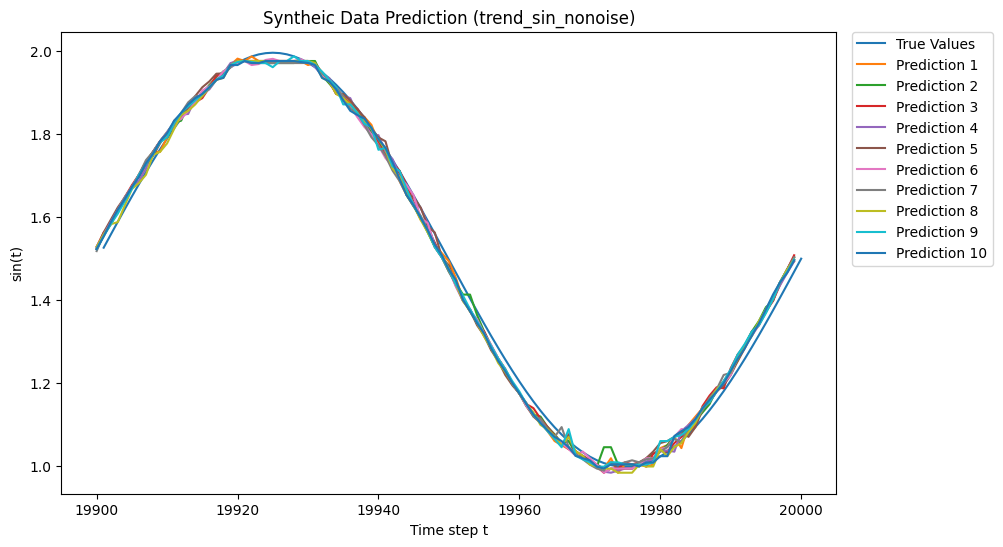

In [16]:
plot_syntheic_load(true_values, case1_predicted_values, config.test_data_path)

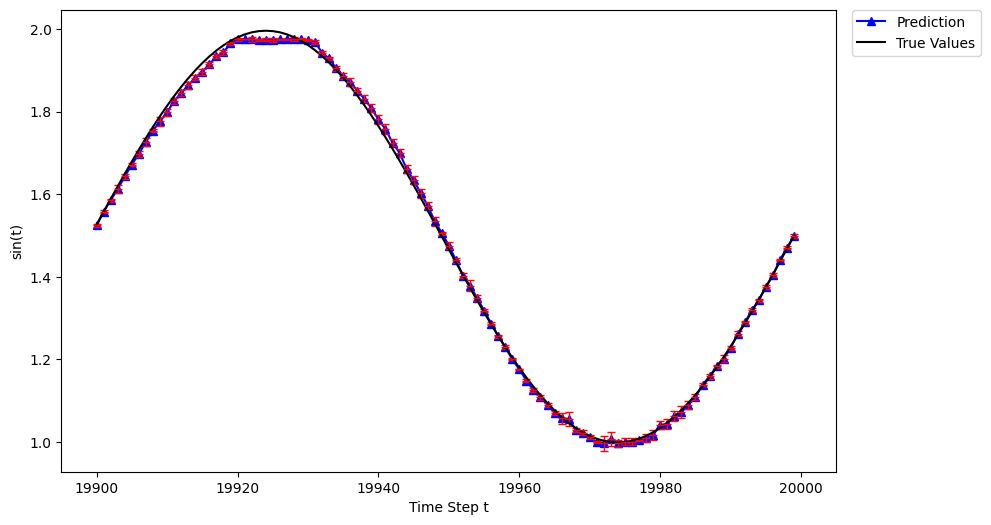

In [17]:
plot_syntheic_load_by_mean_std(true_values, case1_predicted_values, sampling_interval=config.sampling_interval)

In [18]:
# abs(outputdata[n][a] - inputdata[a+1])
case1_error_abs_value = case1_df[predicted_column][config.error_abs_start:config.error_abs_end+1]
case1_error_abs_value

,1,2,3,4,5,6,7,8,9,10
39900,0.001997,0.001997,0.008218,0.001997,0.001997,0.000610,0.008218,0.003218,0.003218,0.006398
39901,0.003232,0.003232,0.002139,0.002139,0.003232,0.003232,0.008232,0.002139,0.003232,0.003232
39902,0.000263,0.001959,0.005263,0.000263,0.005263,0.000263,0.000263,0.000263,0.004181,0.004181
39903,0.003480,0.005807,0.005807,0.001153,0.004553,0.001153,0.005807,0.005807,0.005807,0.001153
39904,0.006147,0.006147,0.003893,0.006147,0.003902,0.001639,0.001639,0.031507,0.011147,0.001639
...,...,...,...,...,...,...,...,...,...,...
39996,0.002254,0.007681,0.002254,0.002254,0.002254,0.002681,0.004416,0.002681,0.006577,0.002681
39997,0.003037,0.008037,0.008037,0.003037,0.005537,0.002293,0.005537,0.002293,0.003037,0.007293
39998,0.000842,0.005842,0.000842,0.001468,0.005842,0.005842,0.005842,0.005842,0.005842,0.005842
39999,0.005052,0.005052,0.005052,0.003081,0.005052,0.000683,0.005052,0.005052,0.000683,0.003081


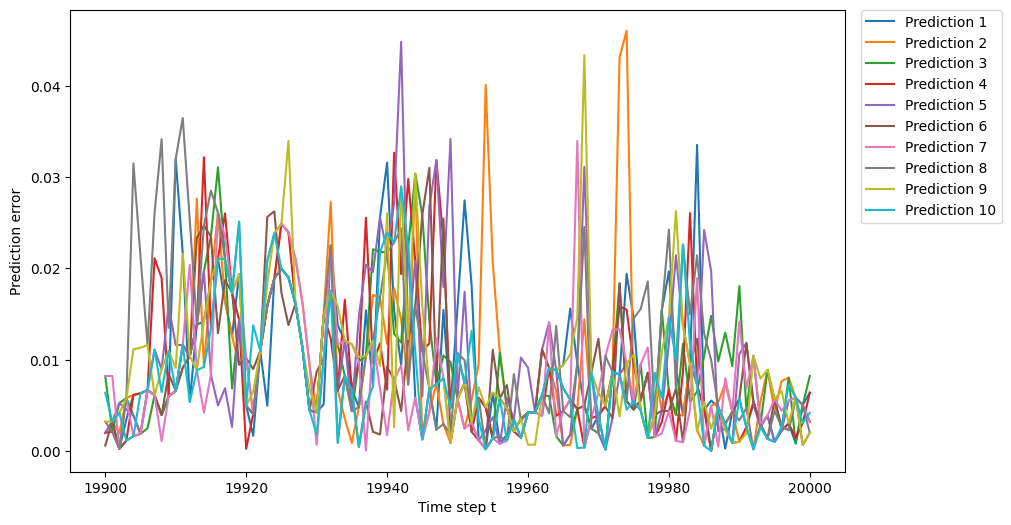

In [19]:
plot_prediction_absolute_error(case1_error_abs_value)

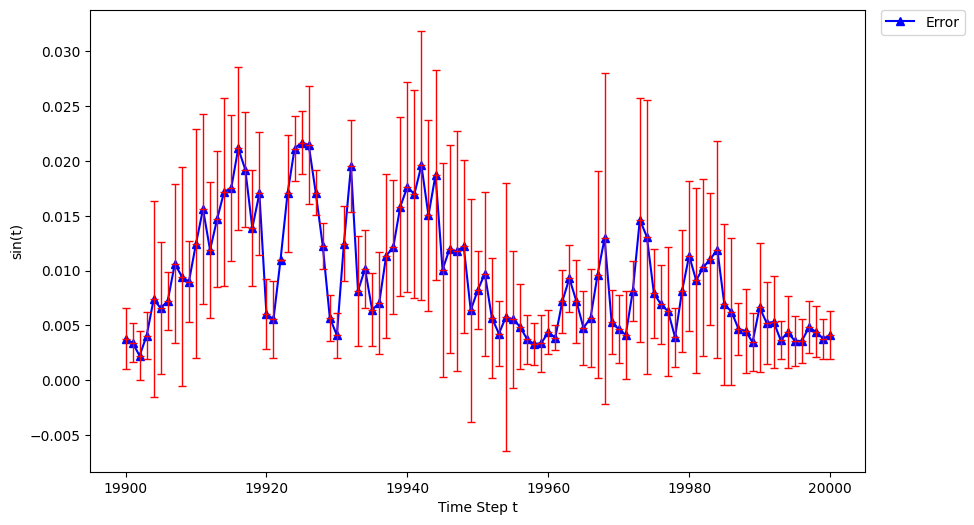

In [20]:
plot_prediction_absolute_error_by_mean_std(case1_error_abs_value, sampling_interval=config.sampling_interval)

## Case2

In [21]:
case2_df = load_csv_data(config.case2_predict_results_path)
case2_df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,0.500000,NaN,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,NaN
1,2,0.531445,NaN,0.531445,0.531445,0.531445,0.531445,0.531445,0.531445,0.531445,0.531445,0.531445,0.531445,NaN
2,3,0.562767,NaN,0.562767,0.562767,0.562767,0.562767,0.562767,0.562767,0.562767,0.562767,0.562767,0.562767,NaN
3,4,0.593841,NaN,0.593841,0.593841,0.593841,0.593841,0.593841,0.593841,0.593841,0.593841,0.593841,0.593841,NaN
4,5,0.624545,NaN,0.624545,0.624545,0.624545,0.624545,0.624545,0.624545,0.624545,0.624545,0.624545,0.624545,NaN


In [22]:
case2_df.tail()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
39996,19996,NaN,NaN,0.004070,0.024082,0.024082,0.054247,0.024082,0.024082,0.024082,0.004070,0.004070,0.024082,NaN
39997,19997,NaN,NaN,0.023547,0.006617,0.023547,0.047364,0.047364,0.023547,0.006617,0.023547,0.006617,0.023547,NaN
39998,19998,NaN,NaN,0.016293,0.007523,0.016293,0.032343,0.016293,0.016293,0.035702,0.007523,0.016293,0.016293,NaN
39999,19999,NaN,NaN,0.001023,0.001023,0.001023,0.027260,0.027260,0.014141,0.001023,0.027260,0.014141,0.001023,NaN
40000,20000,NaN,NaN,0.030734,0.004190,0.030734,0.024611,0.024611,0.024611,0.030734,0.024611,0.004190,0.004190,NaN


In [23]:
# true values need to be shifted by 1
true_values = case2_df["TRUE"][config.start+1:config.end+1+1]
true_values

19901    1.52645
19902    1.55777
19903    1.58884
19904    1.61954
19905    1.64976
          ...   
19997    1.40616
19998    1.43723
19999    1.46855
20000    1.50000
20001        NaN
Name: TRUE, Length: 101, dtype: float64

In [24]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
case2_predicted_values = case2_df[predicted_column][config.start:config.end+1]
case2_predicted_values

,1,2,3,4,5,6,7,8,9,10
19900,1.49509,1.55072,1.55072,1.49509,1.52123,1.55072,1.47104,1.53597,1.55072,1.55072
19901,1.52279,1.52279,1.57863,1.52279,1.53676,1.57863,1.47104,1.52279,1.55072,1.52279
19902,1.56573,1.57863,1.59880,1.58872,1.57863,1.59880,1.55284,1.57863,1.59880,1.57863
19903,1.58722,1.59581,1.61985,1.59581,1.59581,1.63262,1.56573,1.59581,1.61985,1.59581
19904,1.61976,1.61976,1.64538,1.64538,1.61976,1.67270,1.61976,1.61976,1.64538,1.57863
...,...,...,...,...,...,...,...,...,...,...
19996,1.42971,1.39954,1.42971,1.45352,1.45352,1.42971,1.39954,1.42971,1.39954,1.42971
19997,1.45352,1.42971,1.45352,1.46957,1.45352,1.45352,1.40153,1.42971,1.45352,1.45352
19998,1.46957,1.46957,1.46957,1.49581,1.49581,1.48269,1.46957,1.49581,1.48269,1.46957
19999,1.46927,1.49581,1.46927,1.52461,1.52461,1.52461,1.46927,1.52461,1.49581,1.49581


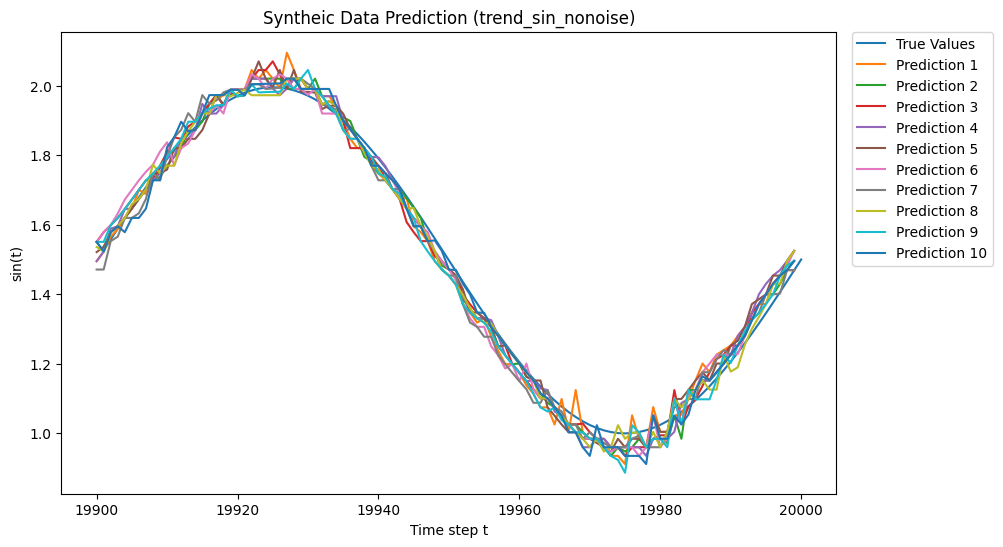

In [25]:
plot_syntheic_load(true_values, case2_predicted_values, config.test_data_path)

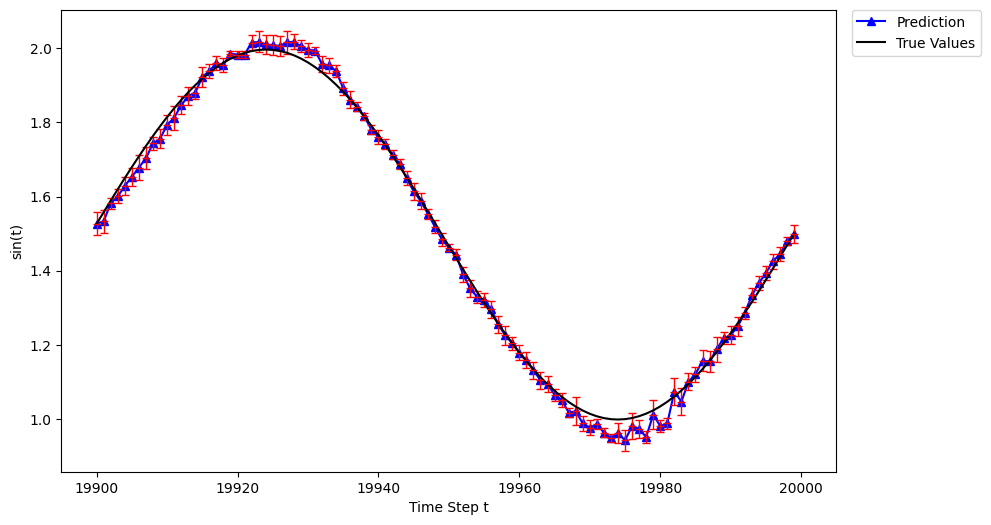

In [26]:
plot_syntheic_load_by_mean_std(true_values, case2_predicted_values, sampling_interval=config.sampling_interval)

In [27]:
# abs(outputdata[n][a] - inputdata[a+1])
case2_error_abs_value = case2_df[predicted_column][config.error_abs_start:config.error_abs_end+1]
case2_error_abs_value

,1,2,3,4,5,6,7,8,9,10
39900,0.023961,0.040974,0.026228,0.023961,0.000122,0.026228,0.023961,0.026228,0.026228,0.000122
39901,0.031364,0.024270,0.024270,0.031364,0.005222,0.024270,0.055411,0.009524,0.024270,0.024270
39902,0.034975,0.034975,0.020859,0.034975,0.021012,0.020859,0.086731,0.034975,0.007050,0.034975
39903,0.023108,0.010211,0.009963,0.000124,0.010211,0.009963,0.036005,0.010211,0.009963,0.010211
39904,0.032319,0.023726,0.000313,0.023726,0.023726,0.013075,0.053808,0.023726,0.000313,0.023726
...,...,...,...,...,...,...,...,...,...,...
39996,0.004070,0.024082,0.024082,0.054247,0.024082,0.024082,0.024082,0.004070,0.004070,0.024082
39997,0.023547,0.006617,0.023547,0.047364,0.047364,0.023547,0.006617,0.023547,0.006617,0.023547
39998,0.016293,0.007523,0.016293,0.032343,0.016293,0.016293,0.035702,0.007523,0.016293,0.016293
39999,0.001023,0.001023,0.001023,0.027260,0.027260,0.014141,0.001023,0.027260,0.014141,0.001023


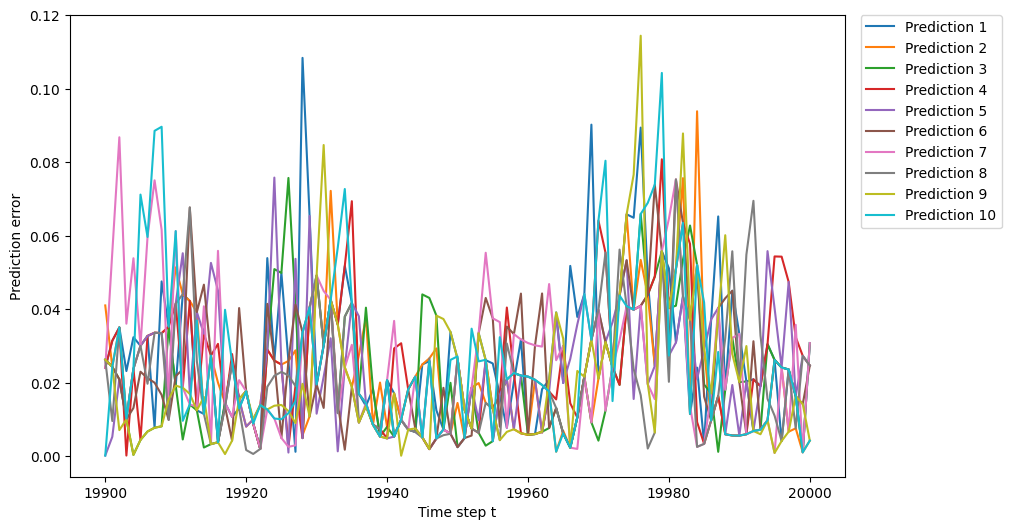

In [28]:
plot_prediction_absolute_error(case2_error_abs_value)

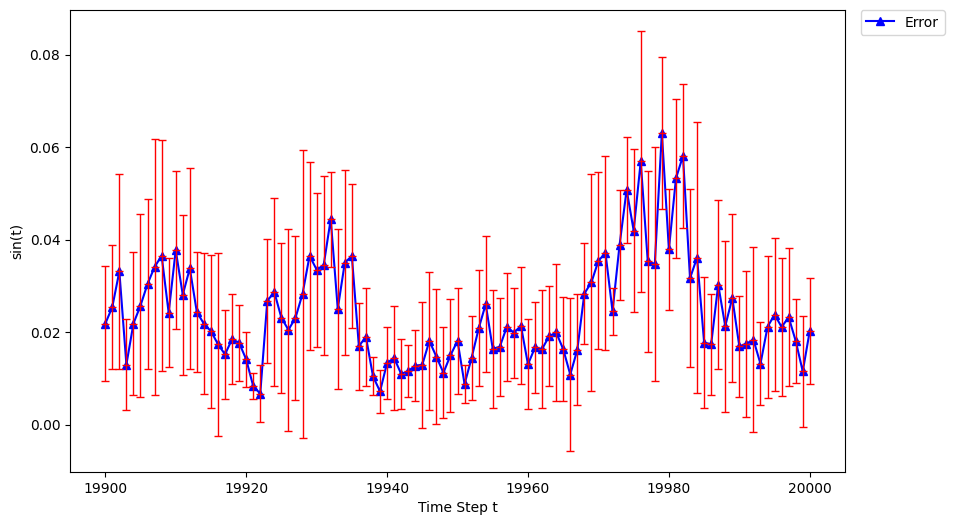

In [29]:
plot_prediction_absolute_error_by_mean_std(case2_error_abs_value, sampling_interval=config.sampling_interval)

## Case 3

In [30]:
case3_df = load_csv_data(config.case3_predict_results_path)
case3_df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,0.500000,NaN,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,NaN
1,2,0.531445,NaN,0.531445,0.531445,0.531445,0.531445,0.531445,0.531445,0.531445,0.531445,0.531445,0.531445,NaN
2,3,0.562767,NaN,0.562767,0.562767,0.562767,0.562767,0.562767,0.562767,0.562767,0.562767,0.562767,0.562767,NaN
3,4,0.593841,NaN,0.593841,0.593841,0.593841,0.593841,0.593841,0.593841,0.593841,0.593841,0.593841,0.593841,NaN
4,5,0.624545,NaN,0.624545,0.624545,0.624545,0.624545,0.624545,0.624545,0.624545,0.624545,0.624545,0.624545,NaN


In [31]:
case3_df.tail()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
39996,19996,NaN,NaN,0.382692,0.389292,0.387692,0.385892,0.387692,0.385892,0.385892,0.385892,0.385892,0.387692,NaN
39997,19997,NaN,NaN,0.414992,0.416592,0.416592,0.416592,0.416592,0.416592,0.416592,0.416592,0.413392,0.416592,NaN
39998,19998,NaN,NaN,0.447662,0.449462,0.449462,0.456062,0.449462,0.449462,0.449462,0.447662,0.452662,0.449462,NaN
39999,19999,NaN,NaN,0.480782,0.480782,0.480782,0.478982,0.480782,0.480782,0.480782,0.478982,0.480782,0.480782,NaN
40000,20000,NaN,NaN,0.512232,0.510432,0.512232,0.512232,0.512232,0.512232,0.511332,0.510432,0.510432,0.512232,NaN


In [32]:
# true values need to be shifted by 1
true_values = case3_df["TRUE"][config.start+1:config.end+1+1]
true_values

19901    1.52645
19902    1.55777
19903    1.58884
19904    1.61954
19905    1.64976
          ...   
19997    1.40616
19998    1.43723
19999    1.46855
20000    1.50000
20001        NaN
Name: TRUE, Length: 101, dtype: float64

In [33]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
case3_predicted_values = case3_df[predicted_column][config.start:config.end+1]
case3_predicted_values

,1,2,3,4,5,6,7,8,9,10
19900,0.992768,0.989568,0.987768,0.988668,0.989568,0.987768,0.994568,0.987768,0.989568,0.994568
19901,0.991168,0.987768,0.989568,0.989568,0.989568,0.987768,0.997768,0.987768,0.989568,0.994568
19902,0.991168,0.987768,0.989568,0.989568,0.989568,0.987768,0.989568,0.987768,0.991168,0.996168
19903,0.991168,0.984568,0.989568,0.984568,0.989568,0.987768,0.989568,0.987768,0.991168,0.989568
19904,0.991168,0.987768,0.989568,0.989568,0.989568,0.987768,0.987768,0.987768,0.989568,0.987768
...,...,...,...,...,...,...,...,...,...,...
19996,0.991168,0.989568,0.989568,0.989568,0.989568,0.989568,0.989568,0.989568,0.992768,0.989568
19997,0.989568,0.987768,0.987768,0.981168,0.987768,0.987768,0.987768,0.989568,0.984568,0.987768
19998,0.987768,0.987768,0.987768,0.989568,0.987768,0.987768,0.987768,0.989568,0.987768,0.987768
19999,0.987768,0.989568,0.987768,0.987768,0.987768,0.987768,0.988668,0.989568,0.989568,0.987768


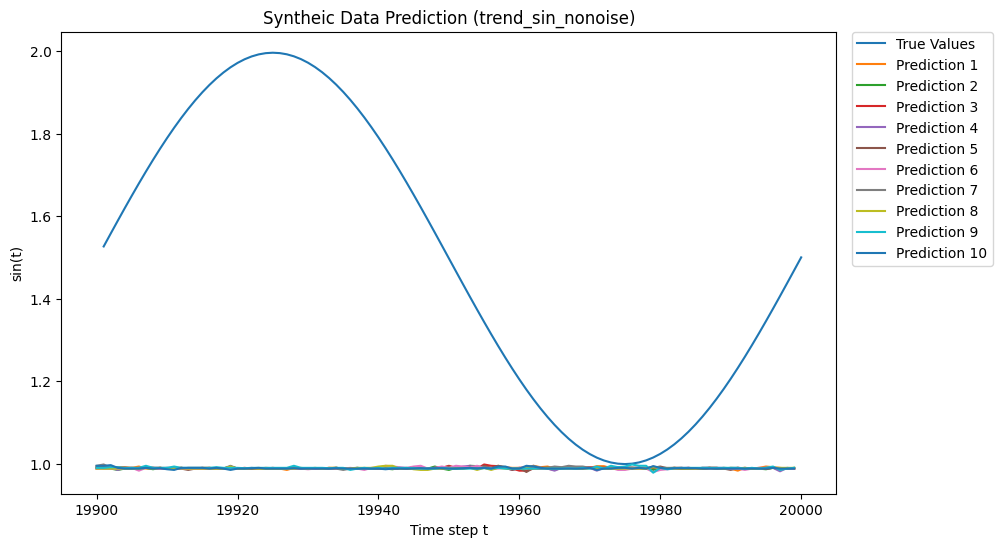

In [34]:
plot_syntheic_load(true_values, case3_predicted_values, config.test_data_path)

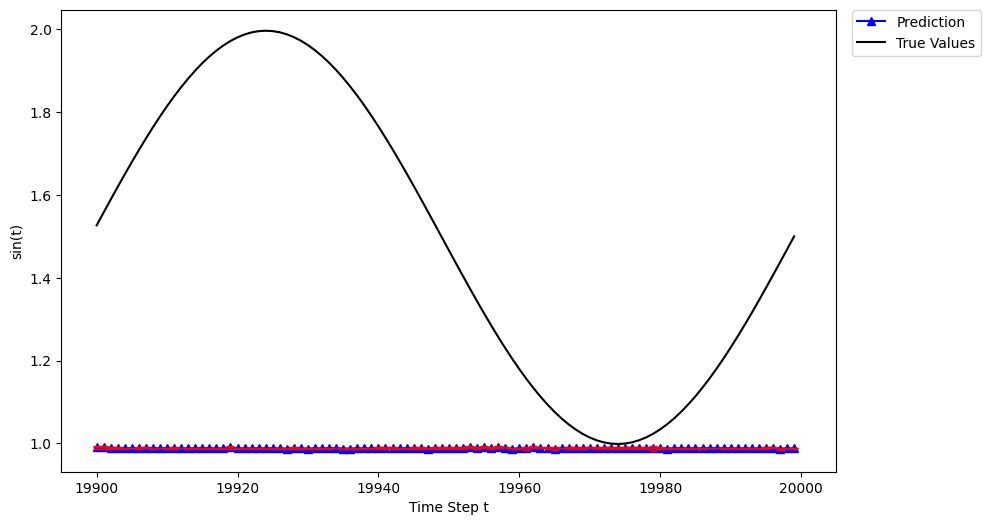

In [35]:
plot_syntheic_load_by_mean_std(true_values, case3_predicted_values, sampling_interval=config.sampling_interval)

In [36]:
# abs(outputdata[n][a] - inputdata[a+1])
case3_error_abs_value = case3_df[predicted_column][config.error_abs_start:config.error_abs_end+1]
case3_error_abs_value

,1,2,3,4,5,6,7,8,9,10
39900,0.505432,0.505432,0.505432,0.507232,0.505432,0.507232,0.500432,0.507232,0.505432,0.503832
39901,0.533682,0.536882,0.538682,0.537782,0.536882,0.538682,0.531882,0.538682,0.536882,0.531882
39902,0.566602,0.570002,0.568202,0.568202,0.568202,0.570002,0.560002,0.570002,0.568202,0.563202
39903,0.597672,0.601072,0.599272,0.599272,0.599272,0.601072,0.599272,0.601072,0.597672,0.592672
39904,0.628372,0.634972,0.629972,0.634972,0.629972,0.631772,0.629972,0.631772,0.628372,0.629972
...,...,...,...,...,...,...,...,...,...,...
39996,0.382692,0.389292,0.387692,0.385892,0.387692,0.385892,0.385892,0.385892,0.385892,0.387692
39997,0.414992,0.416592,0.416592,0.416592,0.416592,0.416592,0.416592,0.416592,0.413392,0.416592
39998,0.447662,0.449462,0.449462,0.456062,0.449462,0.449462,0.449462,0.447662,0.452662,0.449462
39999,0.480782,0.480782,0.480782,0.478982,0.480782,0.480782,0.480782,0.478982,0.480782,0.480782


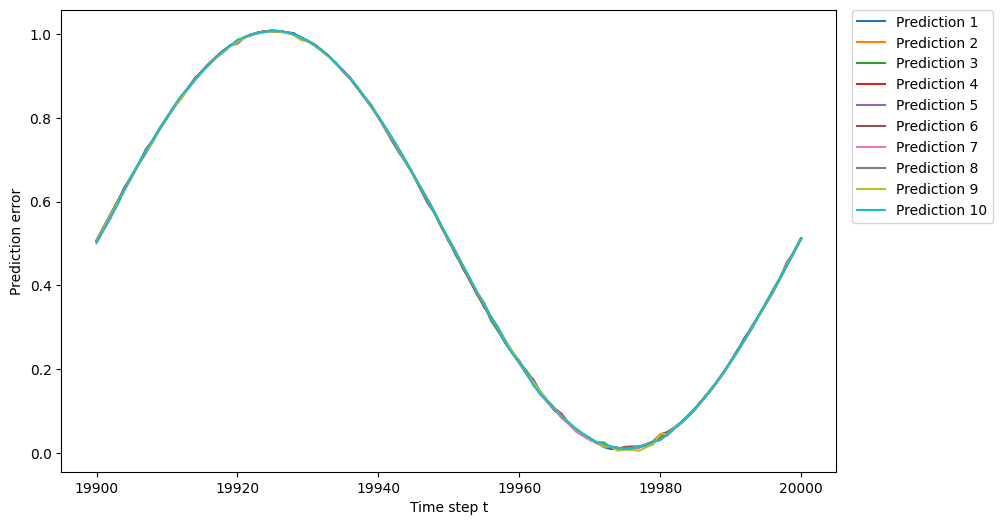

In [37]:
plot_prediction_absolute_error(case3_error_abs_value)

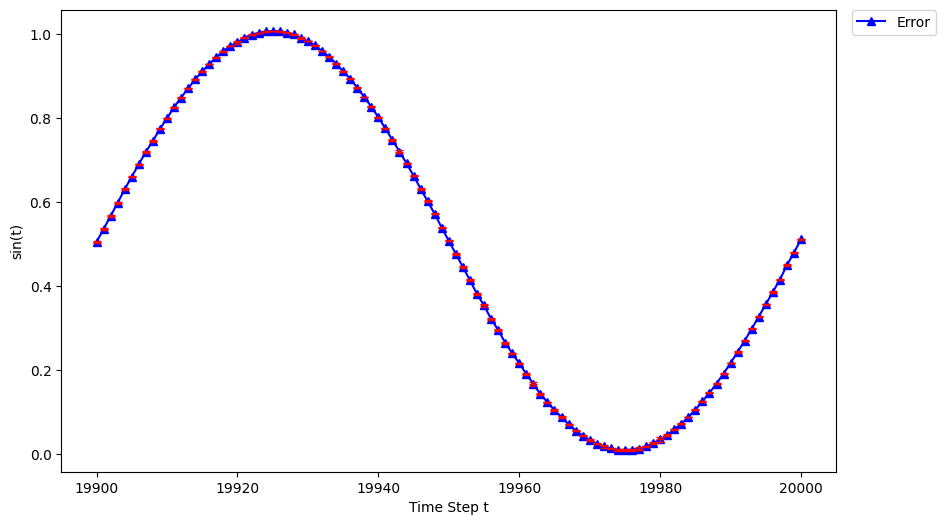

In [38]:
plot_prediction_absolute_error_by_mean_std(case3_error_abs_value, sampling_interval=config.sampling_interval)

## proposed(case4)

In [39]:
case4_df = load_csv_data(config.case4_predict_results_path)
case4_df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,0.500000,NaN,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,NaN
1,2,0.531445,NaN,0.531445,0.531445,0.531445,0.531445,0.531445,0.531445,0.531445,0.531445,0.531445,0.531445,NaN
2,3,0.562767,NaN,0.562767,0.562767,0.562767,0.562767,0.562767,0.562767,0.562767,0.562767,0.562767,0.562767,NaN
3,4,0.593841,NaN,0.593841,0.593841,0.593841,0.593841,0.593841,0.593841,0.593841,0.593841,0.593841,0.593841,NaN
4,5,0.624545,NaN,0.624545,0.624545,0.624545,0.624545,0.624545,0.624545,0.624545,0.624545,0.624545,0.624545,NaN


In [40]:
# true values need to be shifted by 1
true_values = case4_df["TRUE"][config.start+1:config.end+1+1]
true_values

19901    1.52645
19902    1.55777
19903    1.58884
19904    1.61954
19905    1.64976
          ...   
19997    1.40616
19998    1.43723
19999    1.46855
20000    1.50000
20001        NaN
Name: TRUE, Length: 101, dtype: float64

In [41]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
case4_predicted_values = case4_df[predicted_column][config.start:config.end+1]
case4_predicted_values

,1,2,3,4,5,6,7,8,9,10
19900,1.52464,1.52464,1.48094,1.52464,1.52720,1.52464,1.52720,1.52464,1.51964,1.52464
19901,1.55696,1.55845,1.55696,1.55696,1.55994,1.55696,1.55696,1.55696,1.54220,1.55845
19902,1.58974,1.58696,1.58696,1.58835,1.58974,1.58696,1.58696,1.58974,1.58696,1.58696
19903,1.61982,1.57494,1.61982,1.61982,1.61982,1.62482,1.62209,1.62209,1.61696,1.62209
19904,1.65224,1.63709,1.64985,1.64985,1.64709,1.65485,1.64985,1.65224,1.64709,1.64985
...,...,...,...,...,...,...,...,...,...,...
19996,1.40476,1.40746,1.40746,1.40476,1.40746,1.40611,1.40746,1.40746,1.40476,1.40132
19997,1.43756,1.43510,1.43510,1.43246,1.43510,1.43378,1.43756,1.43756,1.43510,1.43510
19998,1.46713,1.46844,1.46713,1.46713,1.46713,1.46713,1.47213,1.46975,1.46517,1.46975
19999,1.49964,1.49964,1.49213,1.49713,1.49839,1.49713,1.50464,1.49964,1.49475,1.50198


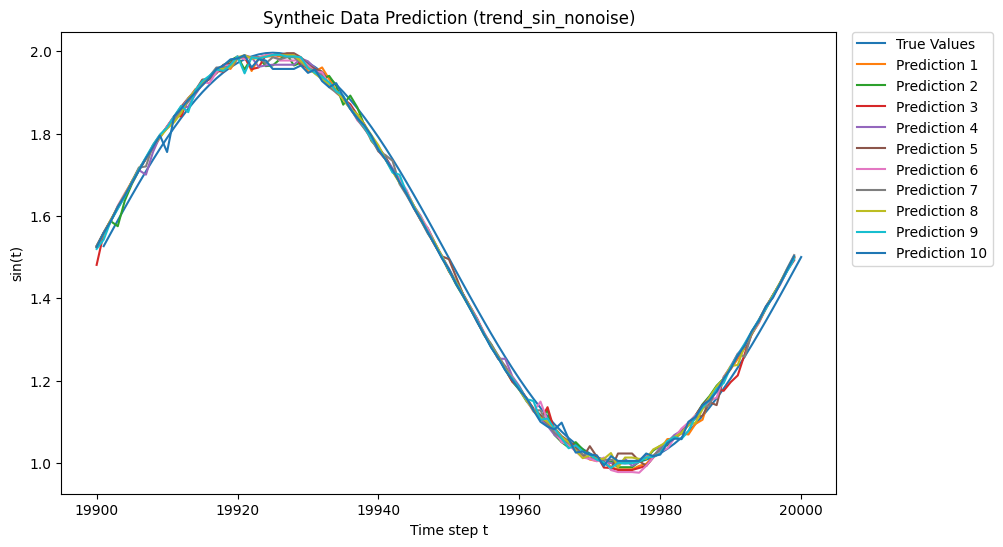

In [42]:
plot_syntheic_load(true_values, case4_predicted_values, config.test_data_path)

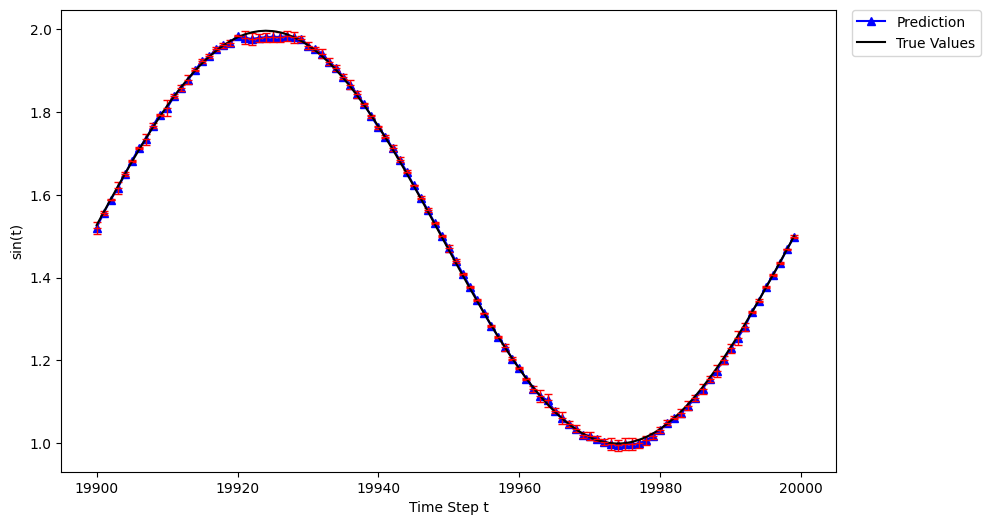

In [43]:
plot_syntheic_load_by_mean_std(true_values, case4_predicted_values, sampling_interval=config.sampling_interval)

In [44]:
# abs(outputdata[n][a] - inputdata[a+1])
case4_error_abs_value = case4_df[predicted_column][config.error_abs_start:config.error_abs_end+1]
case4_error_abs_value

,1,2,3,4,5,6,7,8,9,10
39900,0.002867,0.002867,0.005252,0.000360,0.001976,0.002867,0.000360,0.005252,0.002867,0.002867
39901,0.001810,0.001810,0.045509,0.001810,0.000751,0.001810,0.000751,0.001810,0.006810,0.001810
39902,0.000813,0.000679,0.000813,0.000813,0.002170,0.000813,0.000813,0.000813,0.015569,0.000679
39903,0.000898,0.001883,0.001883,0.000492,0.000898,0.001883,0.001883,0.000898,0.001883,0.001883
39904,0.000284,0.044600,0.000284,0.000284,0.000284,0.005284,0.002553,0.002553,0.002583,0.002553
...,...,...,...,...,...,...,...,...,...,...
39996,0.000283,0.000283,0.002000,0.000283,0.004717,0.002000,0.002000,0.002000,0.000283,0.004717
39997,0.001404,0.001300,0.001300,0.001404,0.001300,0.000052,0.001300,0.001300,0.001404,0.004842
39998,0.000328,0.002133,0.002133,0.004770,0.002133,0.003452,0.000328,0.000328,0.002133,0.002133
39999,0.001417,0.000109,0.001417,0.001417,0.001417,0.001417,0.003583,0.001198,0.003381,0.001198


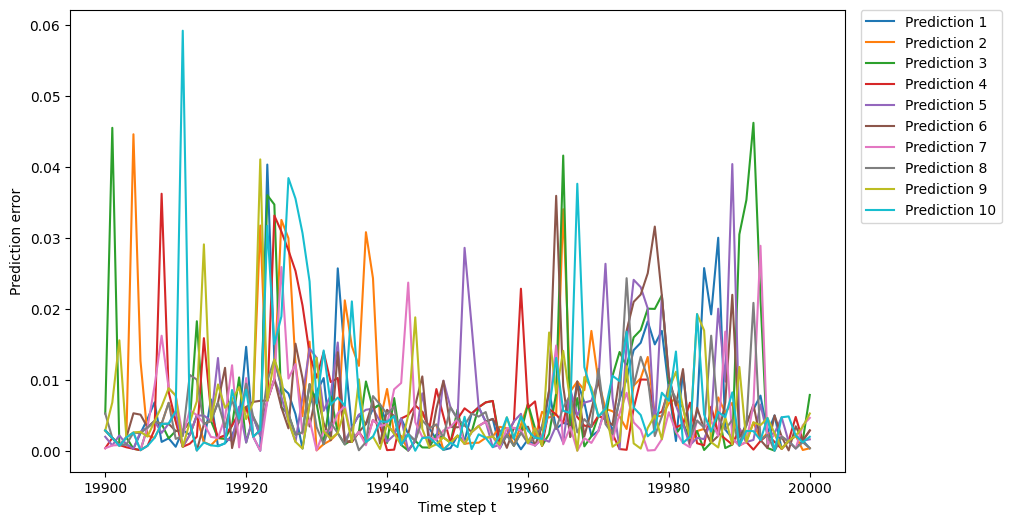

In [45]:
plot_prediction_absolute_error(case4_error_abs_value)

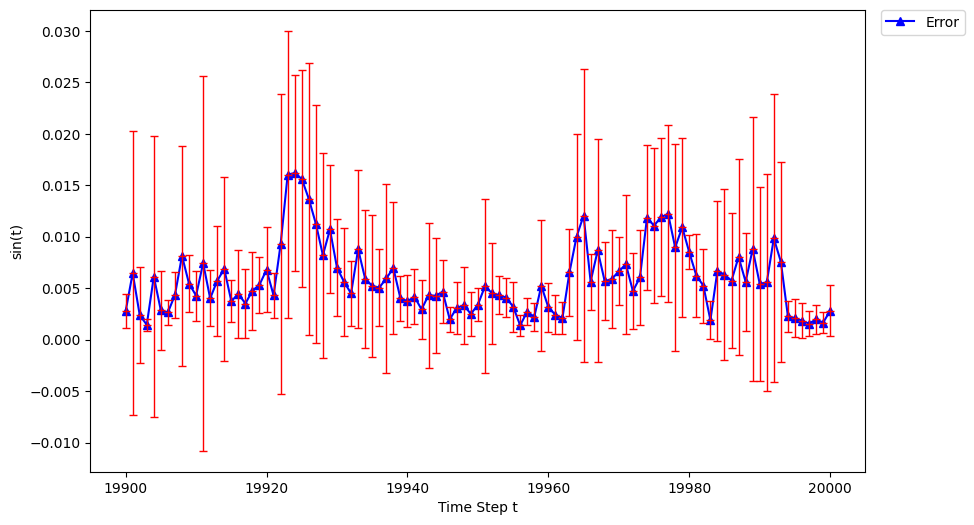

In [46]:
plot_prediction_absolute_error_by_mean_std(case4_error_abs_value, sampling_interval=config.sampling_interval)

# Summary

In [47]:
predicted_values_list = []
error_abs_value_list = []

# The following are the case labels you want to pass
# labels = ['Case 1', 'Case 2', 'Case 3', 'Case 4']
labels = ['Case 1', 'Case 4']

# The following are the case labels you want to pass
predicted_values_list.append(case1_predicted_values)    # Add prediction values for Case 1
# predicted_values_list.append(case2_predicted_values)    # Add prediction values for Case 2
# predicted_values_list.append(case3_predicted_values)    # Add prediction values for Case 3
predicted_values_list.append(case4_predicted_values)    # Add prediction values for Case 4


error_abs_value_list.append(case1_error_abs_value)      # Add error values for Case 1
# error_abs_value_list.append(case2_error_abs_value)      # Add error values for Case 2
# error_abs_value_list.append(case3_error_abs_value)      # Add error values for Case 3
error_abs_value_list.append(case4_error_abs_value)      # Add error values for Case 4

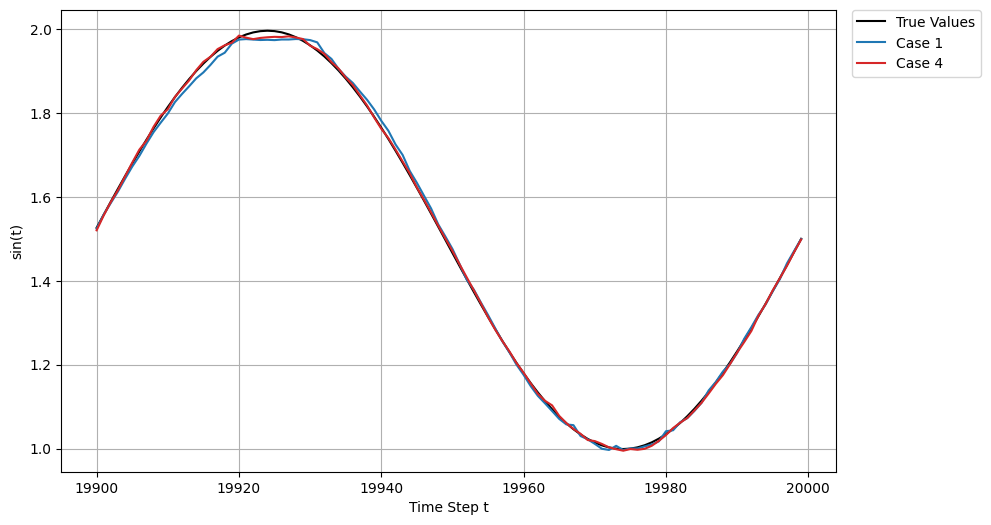

In [48]:
# plot_syntheic_load_list_by_mean_std(true_values, predicted_values_list, sampling_interval=config.sampling_interval)
plot_syntheic_load_list_by_mean_std_with_labels(true_values, predicted_values_list, labels=labels, sampling_interval=config.sampling_interval)


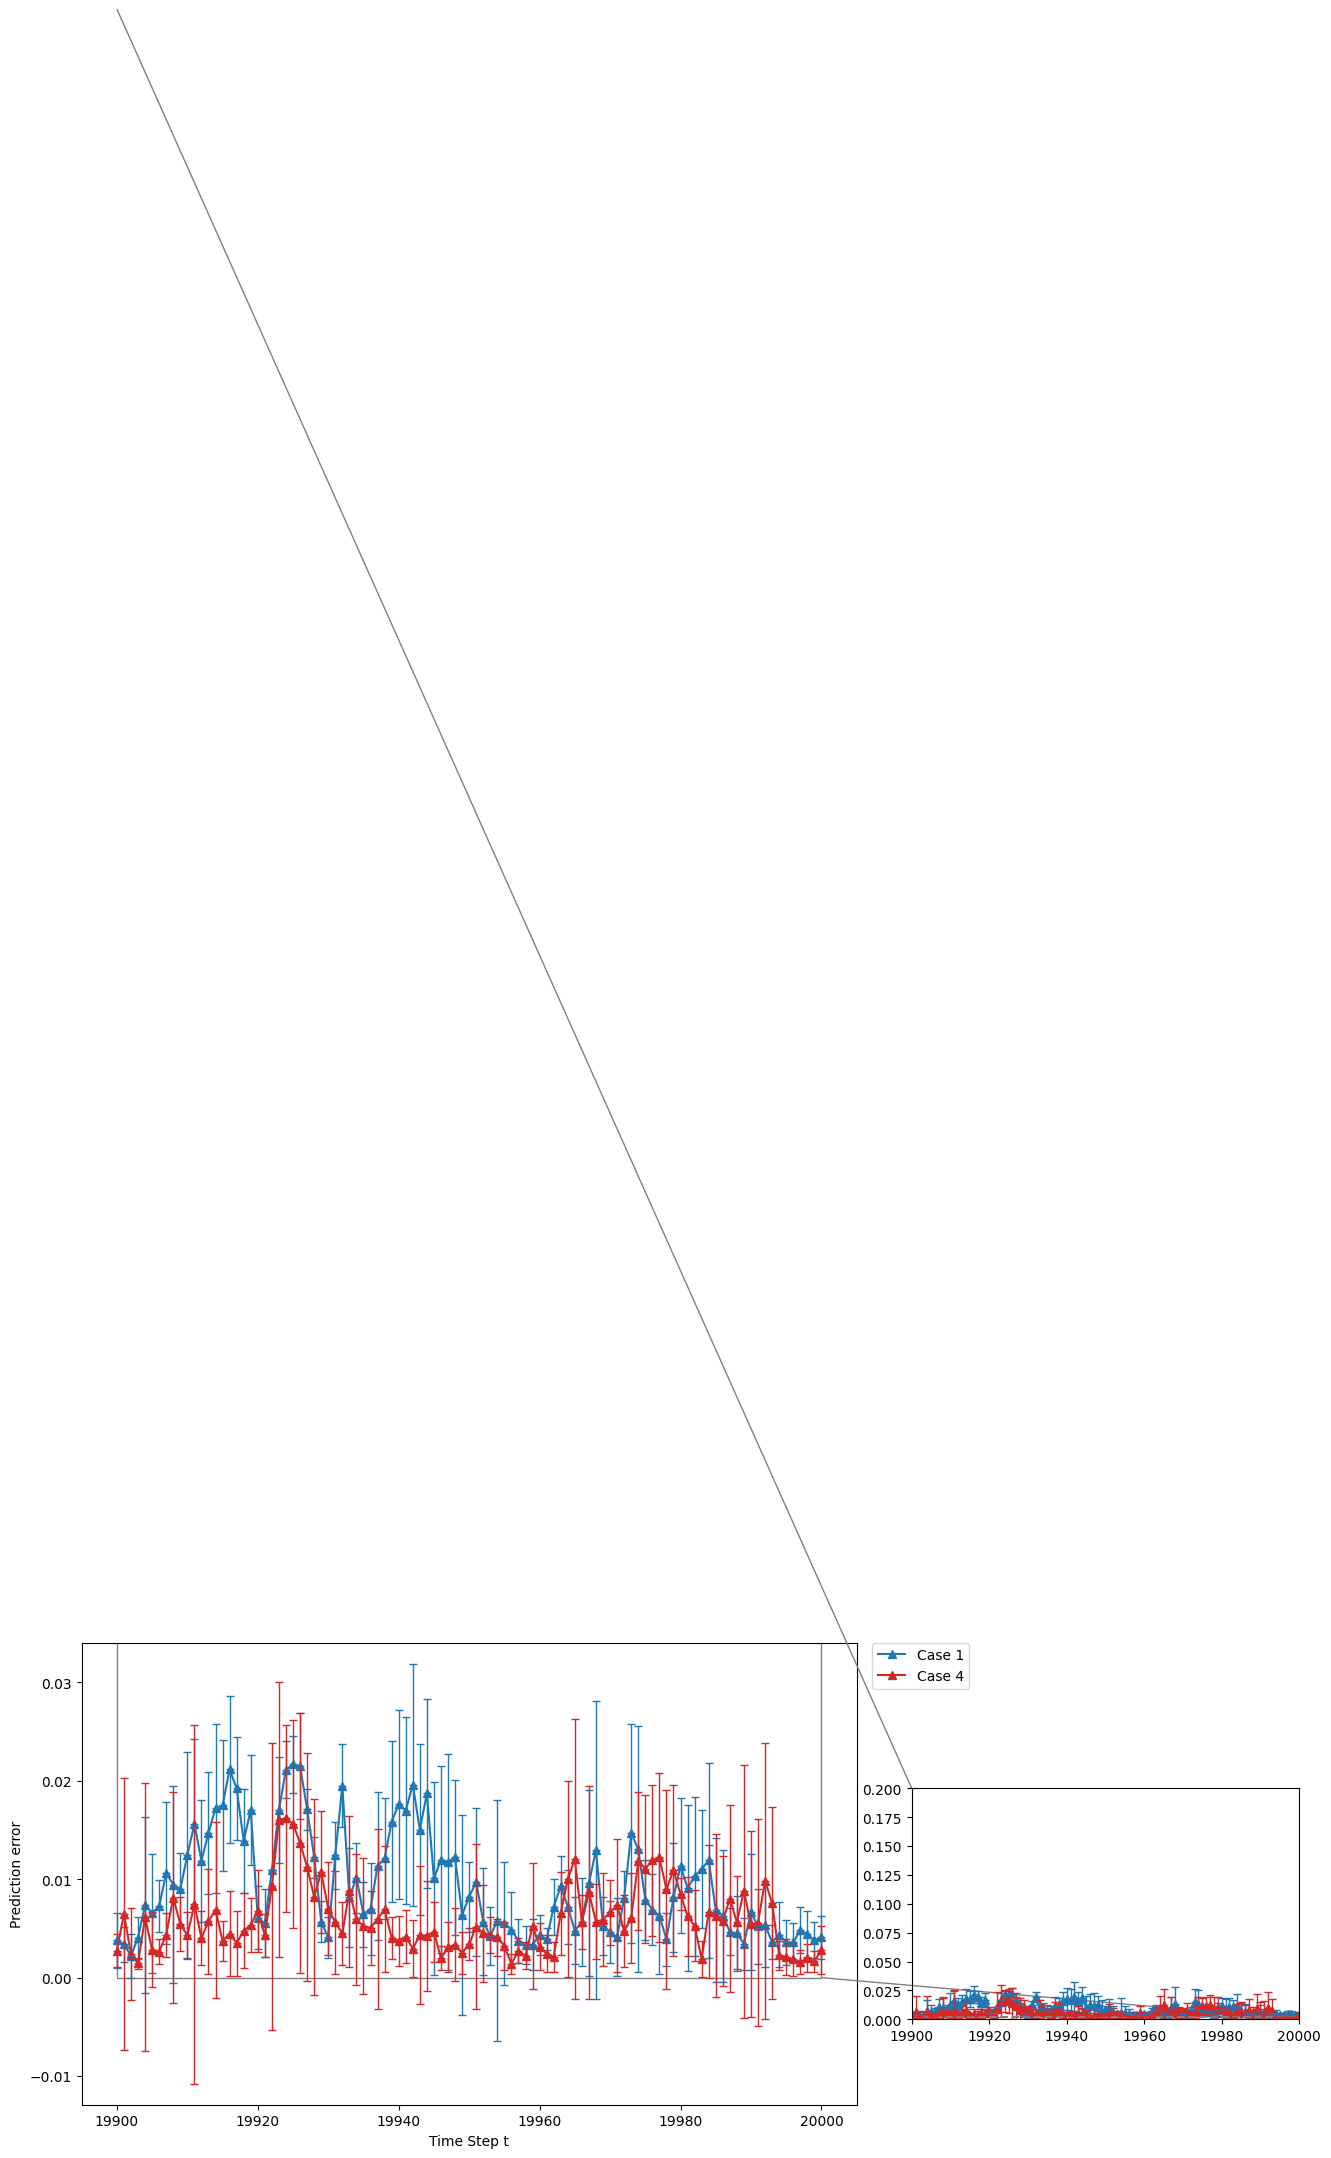

In [49]:
# zoom_coords = ((zoom_xmin, zoom_xmax), (zoom_ymin, zoom_ymax))
# plot_prediction_absolute_error_list_by_mean_std(error_abs_value_list, sampling_interval=config.sampling_interval, zoom_coords=config.zoom_coords)
plot_prediction_absolute_error_list_by_mean_std_with_labels(error_abs_value_list, labels=labels ,sampling_interval=config.sampling_interval, zoom_coords=config.zoom_coords)